<a href="https://colab.research.google.com/github/manjotmb20/Judicial-Decision-Prediction/blob/master/assignmenttext.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt


In [313]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [0]:
from sklearn.feature_extraction.text import CountVectorizer
import operator

In [0]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [0]:
from keras.layers import Embedding,Conv1D,GlobalMaxPool1D,Dense,Activation,Dropout
from keras.models import Sequential

In [318]:
!pip install tokenizer

In [0]:
zipref=zipfile.ZipFile("Train_tags.zip")
zipref.extractall()
zipref.close()
zipref=zipfile.ZipFile("Train_docs.zip")
zipref.extractall()
zipref.close()

In [0]:
list1=[]
col=[]
tags=[]
for i in range(80):
  list1.append("case_{}_statement.txt".format(i))
  col.append(i)
  tags.append("case{}.txt".format(i))



In [0]:
df["tag2"]=listtag

In [0]:
thisset=set()

In [0]:
thisset.add("1")

In [0]:
thisset.add("2")
thisset.add("1")

In [381]:
thisset

{'1', '2'}

In [0]:
thisset=set()
newset=[]
for i in listtag:
  for word in i.split():
    thisset.add(word)
    newset.append(word)


In [390]:
len(newset)

3625

In [0]:

all_genres = nltk.FreqDist(newset) 
dftag1=pd.DataFrame()
dftag1["tag"]=all_genres.keys()
dftag1["count"]=all_genres.values()

In [0]:
g = dftag1.nlargest(columns="count", n = 50) 

In [397]:
g

,tag,count
1,of,175
22,"India,",27
25,"Order,",27
420,Of,27
292,"Court,",25
325,to,22
505,the,22
99,"Appeal,",21
309,Public,20
150,Judicial,19


In [0]:
df=pd.DataFrame(data)

In [0]:
df['index']=col

In [0]:
path='../content/Train_tags'

In [0]:
listtag=[]
for row in tags:
  tag=open("../content/Train_tags/"+row).read()
  listtag.append(tag)

In [0]:
df['tags']=listtag

In [327]:
len(listtag)

80

In [0]:
vector=CountVectorizer(tokenizer=lambda x:x.split(","))
tag=vector.fit_transform(df["tags"])

In [329]:
tag

<80x1319 sparse matrix of type '<class 'numpy.int64'>'
	with 2157 stored elements in Compressed Sparse Row format>

In [330]:
tagname=vector.get_feature_names()
print("Some tagnames are",tagname[:-10])

Some tagnames are [' abetment of suicide', ' absconding', ' access', ' accident', ' accidental death', ' accommodation', ' account', ' account book', ' accounts', ' accusation', ' accused', ' acquisition', ' acquisition proceeding', ' act', ' ad', ' additional advocate general', ' additional evidence', ' adjournment', ' adjudicating authority', ' adjudication', ' adjudication proceeding', ' adjustment', ' administration', ' administration of justice', ' administrative', ' administrative authority', ' administrative power', ' admiralty jurisdiction', ' adoption', ' adoptive parent', ' advance licence', ' adverse entry', ' advertisement', ' advocate general', ' against any liability', ' age', ' agency', ' agent', ' agrarian reform', ' agreement', ' agreement for sale', ' agricultural', ' agricultural land', ' alcoholic liquor', ' allegation of suppression', ' allotment order', ' allotted', ' allottee', ' allowance', ' alternate charge', ' alternative remedy', ' ambiguity', ' amending act

In [0]:
freq=tag.sum(axis=0).A1
result=dict(zip(tagname,freq))

In [0]:
sortedx=sorted(result.items(),key=operator.itemgetter(1),reverse=True)

In [0]:
dftag=pd.DataFrame(sortedx)


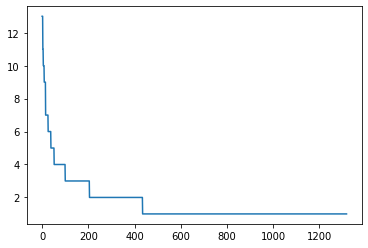

In [334]:
plt.plot(dftag[1])
plt.show()

In [0]:

list1=[]
stop=set(stopwords.words("english"))
ps=PorterStemmer()
lemmatizer=WordNetLemmatizer()
train_df=pd.DataFrame()
train_df['name']=[]
for name in df.name:
  texts=[]
  x=open("../content/Train_docs/"+name,"r",encoding = "ISO-8859-1").read()
  for line in x.split("\n"):
    texts.append(" ".join(lemmatizer.lemmatize(word) for word in line.split() if word not in stop))
  list1.append(texts)
  

In [0]:
train_df["name"]=list1

In [337]:
type(train_df["name"])

pandas.core.series.Series

In [0]:
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [0]:
train_df["tags"]=listtag

In [0]:
num_classes=500
grouped_tags=train_df.groupby("tags").size().reset_index(name='count')
most_common_tags=grouped_tags.nlargest(num_classes,columns='count')


In [0]:
train_df["tags"]=train_df["tags"].map(lambda x:x.split(","))

In [342]:
grouped_tags

,tags,count
0,"Abandoned, Adjudication, Adjudication Proceedi...",1
1,"Abandonment, Account, Bill, Capital Structure,...",1
2,"Abetment, Abetment of Suicide, Absconding, Acc...",1
3,"Abetment, Abetment of Suicide, Alternate Charg...",1
4,"Abetment, Abetment of Suicide, Circumstantial ...",1
...,...,...
74,"Constitutional Validity, Defamation",1
75,"Contempt of Court, False Statement, Legal Obli...",1
76,"Daily Wage, Discharge, Dismissal, Equal Pay fo...",1
77,"Decision, Exemption, Exemption Notification, I...",1


In [0]:
multilabel_binarizer=MultiLabelBinarizer()
multilabel_binarizer.fit(train_df["tags"])
labels=multilabel_binarizer.classes_

In [344]:
len(labels)

1322

In [0]:
maxlen=500
max_words=20000
tokenizer=Tokenizer(num_words=max_words,lower=True)
tokenizer.fit_on_texts(train_df["name"])

In [346]:
tokenizer

In [0]:
def get_features(text_series):
  sequences=tokenizer.texts_to_sequences(text_series)
  return pad_sequences(sequences,maxlen=maxlen)

In [0]:
x=get_features(train_df["name"])
y=multilabel_binarizer.transform(train_df["tags"])

In [0]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=47)

In [350]:
len(x_train)

64

In [351]:
filter_length=300
num_classes=1322
model=Sequential()
model.add(Embedding(max_words,20,input_length=maxlen))
model.add(Dropout(0.1))
model.add(Conv1D(filter_length,3,padding='valid',activation='relu',strides=1))
model.add(GlobalMaxPool1D())
model.add(Dense(num_classes))
model.add(Activation('sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['categorical_accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 500, 20)           400000    
_________________________________________________________________
dropout_5 (Dropout)          (None, 500, 20)           0         
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 498, 300)          18300     
_________________________________________________________________
global_max_pooling1d_5 (Glob (None, 300)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 1322)              397922    
_________________________________________________________________
activation_5 (Activation)    (None, 1322)              0         
Total params: 816,222
Trainable params: 816,222
Non-trainable params: 0
________________________________________________

In [352]:
callbacks=[ReduceLROnPlateau(),EarlyStopping(patience=4),ModelCheckpoint(filepath='model-conv1d.h5',save_best_only=True)]

NameError: ignored

In [0]:
history=model.fit(x_train,y_train,epochs=50,batch_size=16,validation_split=0.1)

In [0]:
t=model.predict(x_test)

In [0]:
model.evaluate(x=x_test,y=y_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,t)

In [0]:
multilabel_binarizer.inverse_transform(y_test)[3]